In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
%matplotlib inline

## Statistics

### 1

Assuming there is actually no effect of the marketing campaign on sales, we would expect to see this or more extreme data less than 5% of the time. 

### 2

Assuming the null is correct, I would expect to get a p-value less than 0.05 5 times. The probability of the null actually being correct (conditional on the data of the first subsample) is 0.05 (probability of a type 1 error). 

The probability the null is correctly rejected based on the first test is 0.95 (1- the prob. of a type 1 error). Conditional on the null not being correct, the probability it is not rejected in subsequent tests is equal to the probability of a type 2 error (which I'll denote by beta_i, where i corresponds to the subsample). Since I don't know beta_i for all i (though it would be affected by factors such as sample size), it would be used to calculate the expected number of times the test stat is less than 0.05. After arriving at this value (call it T), the expected value of times the p-value is less than 0.05 is 0.05*(5) + 0.95*(T). 





## Python Programming

### 1

In [109]:
# a
[2]*1000

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


In [110]:
# b
[num%7 for num in range(1000)]

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,


In [111]:
# c
np.random.normal(10, 3, 1000)

array([ 11.37745255,   9.98795939,  13.07634891,   9.90598397,
        10.72397154,  10.67054885,  12.63805597,   7.94545979,
        16.64533487,   9.30455855,   6.68430401,  12.70866032,
         7.54249359,   8.56545203,  10.06971105,  10.40299288,
         6.89177667,   8.98275469,  10.06976626,  10.80457491,
        11.74016529,   6.10930334,  10.57540148,  11.96844919,
        10.29747344,   3.76117082,  12.51570543,  13.15262701,
         9.28898417,  10.5532702 ,  10.14814465,  13.58761542,
         8.77384882,  14.90736118,   5.554774  ,   2.44714432,
         7.68896663,  10.74769576,   7.49101839,   9.66135316,
         9.10027848,   5.74572534,   8.10438597,  12.18715612,
        10.84390482,   6.53690761,   9.71225914,   3.12087764,
         9.34723097,  11.94072219,  10.81431993,  11.32714497,
         8.61150257,   9.38347783,   7.89909135,  10.72378765,
         7.09195025,   8.62413509,   9.52698416,  12.77611176,
         6.75387261,   9.91134927,   9.14721451,  12.29

### 2

In [13]:
[sum(vec[x:x+7]) for x in range(0, len(vec), 7)]

[3.1500424183701257, 4.5719902724435304, 3.7974392180486078]


### 3

In [19]:
df = pd.read_csv('../hackerrank_data/skill-assessment/DSTakeHome/prog1.csv')
df[df['state']=='OH']['transactions'].mean()

3862.0

## Machine Learning

### 1

Modeling a data as signal plus noise, underfitting is not capturing enough of the signal, whereas overfitting is capturing too much noise. 

This should be avoided because it means the model does not generalize as well to other subsamples where the noise is likely different. 

If your model does not generalize well to other independent datasets (drawn from the same population). One way to get a sense of this is through cross-validation---i.e., is there a large difference in the value of your scoring metric between your training and test sets.

### 2

Using K-means, perform the K-means algorithm for various values of k. For each, calculate the sum of squared error (i.e., the distance of each point to its final centroid, squared, and summed over all datas points). Plot this for each value of k and try to find an elbow. 

## Time Series

### 1

There is possibly a yearly seasonal component in the data. Only testing on the last month may not reveal whether the extent of the seasonality was captured by the model. The second method may have difficulties fully assessing parameter stability across years since you're training on multiple years. A possible improvement (in terms of robustness) is a type of cross-validation in which you train separately on each possible two year pairing (year 1 and year2, year 1 and year 3, year 2 and year3) and test against the data from the left out year (year 3, year 2, and year 1, respectively), taking the average (or min, or some other statistic) across the three folds. 



### 2

In [114]:
df_ts1 = pd.read_csv('../hackerrank_data/skill-assessment/DSTakeHome/ts1.csv')
df_ts2 = pd.read_csv('../hackerrank_data/skill-assessment/DSTakeHome/ts2.csv')
df_ts3 = pd.read_csv('../hackerrank_data/skill-assessment/DSTakeHome/ts3.csv')

df_ts1.date = pd.to_datetime(df_ts1.date)
df_ts1.index = df_ts1.date
df_ts1.drop(['date'], 1, inplace=True)

df_ts2.date = pd.to_datetime(df_ts2.date)
df_ts2.index = df_ts2.date
df_ts2.drop(['date'], 1, inplace=True)

df_ts3.date = pd.to_datetime(df_ts3.date)
df_ts3.index = df_ts3.date
df_ts3.drop(['date'], 1, inplace=True)

In [115]:
def ts_plot(df):
    fig = plt.figure(figsize=(18,8))
    ax = fig.add_subplot(1,1,1)
    ax.plot(df)
    plt.show()

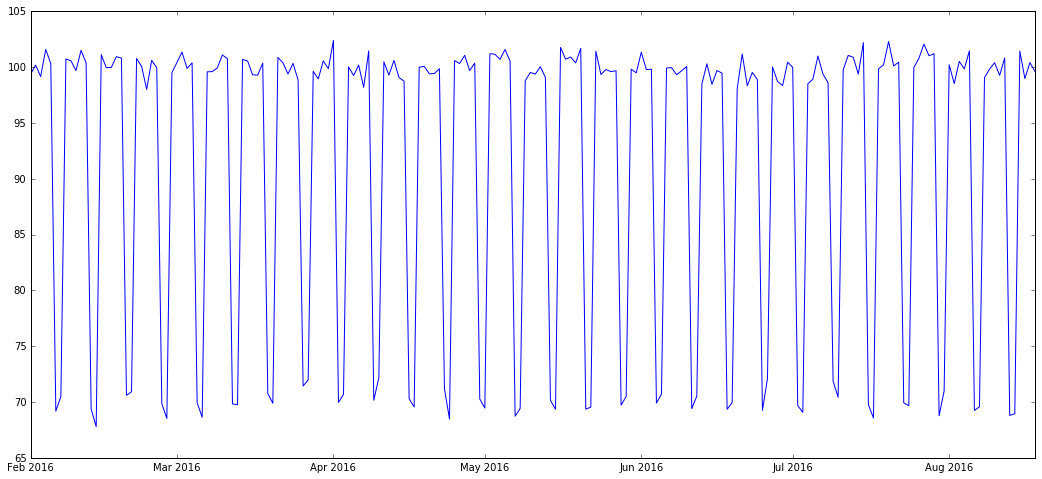

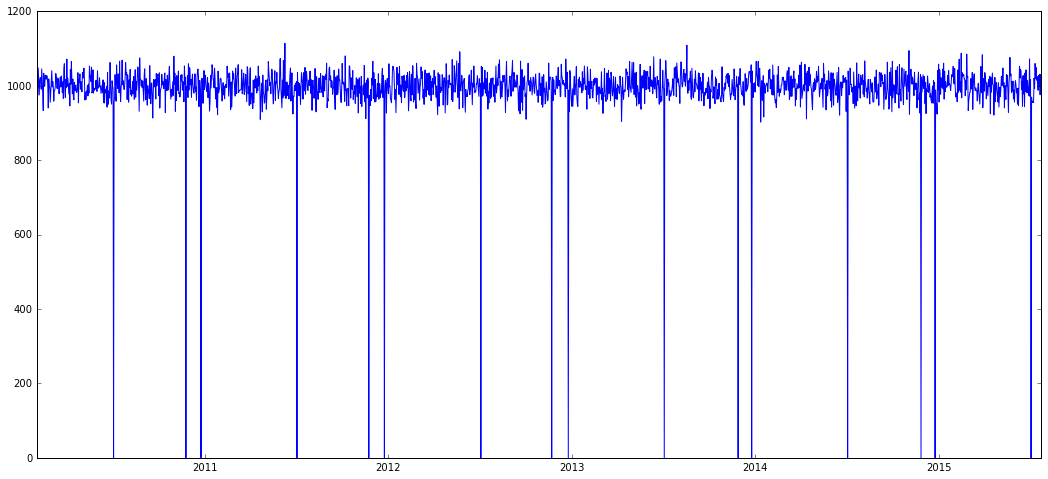

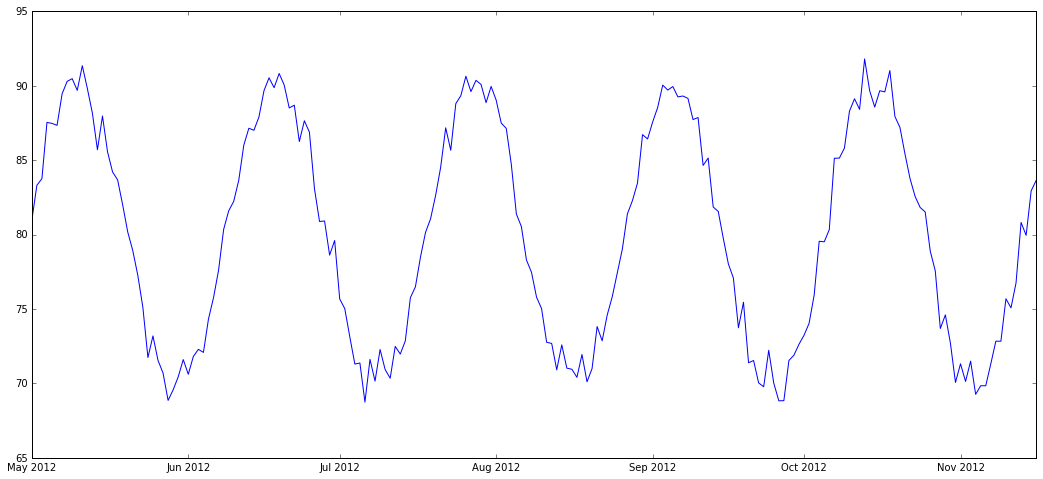

In [116]:
ts_plot(df_ts1)
ts_plot(df_ts2)
ts_plot(df_ts3)

In [117]:
def acf_pcf_plot(df, lags):
    fig = plt.figure(figsize=(18,8))
    ax1 = fig.add_subplot(2,1,1)
    fig = plot_acf(df, lags=lags, ax=ax1)
    ax2 = fig.add_subplot(2,1,2)
    fig = plot_pacf(df, lags=lags, ax=ax2)
    plt.show()

#### ts1.csv

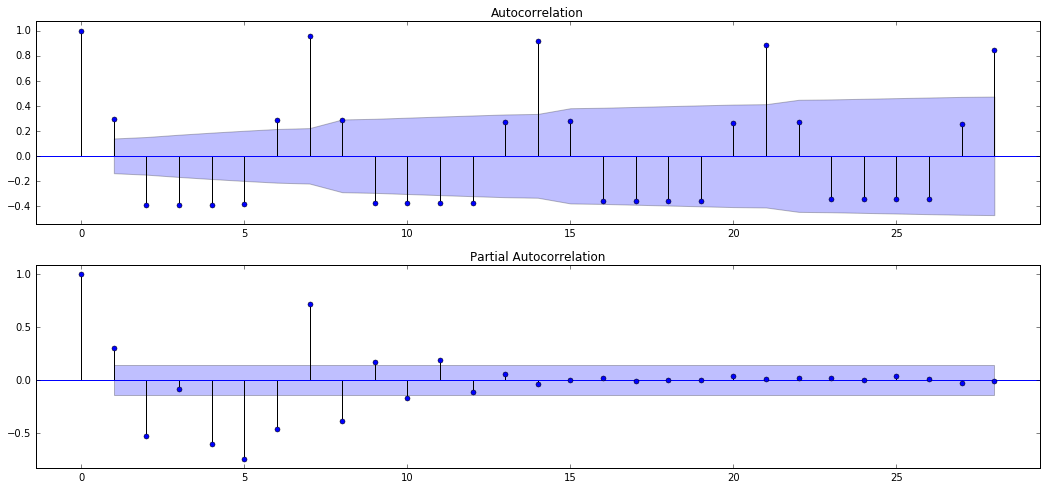

In [118]:
acf_pcf_plot(df_ts1, 28) #shows a strong seasonal component, s=7

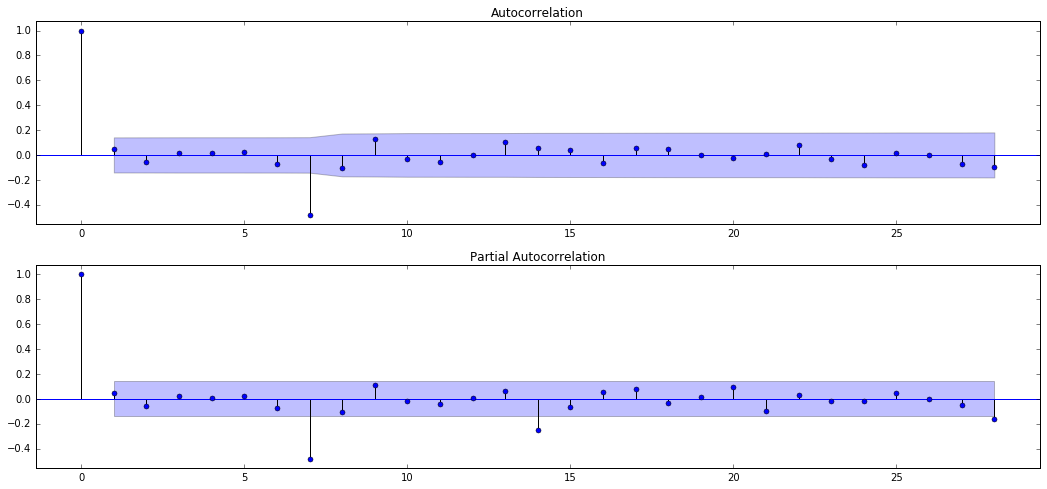

In [119]:
df_ts1_diff = df_ts1.diff(periods=7).dropna() #take a seasonal difference
acf_pcf_plot(df_ts1_diff, 28) 

I would include the s=7 lag of the target variable as well as an SMA(1) term since there is a negative spike in the ACF at lag 7.

#### ts2.csv

            target
date              
2010-07-04     0.0
2010-11-25     0.0
2010-12-25     0.0
2011-07-04     0.0
2011-11-24     0.0
2011-12-25     0.0
2012-07-04     0.0
2012-11-22     0.0
2012-12-25     0.0
2013-07-04     0.0
2013-11-28     0.0
2013-12-25     0.0
2014-07-04     0.0
2014-11-27     0.0
2014-12-25     0.0
2015-07-04     0.0


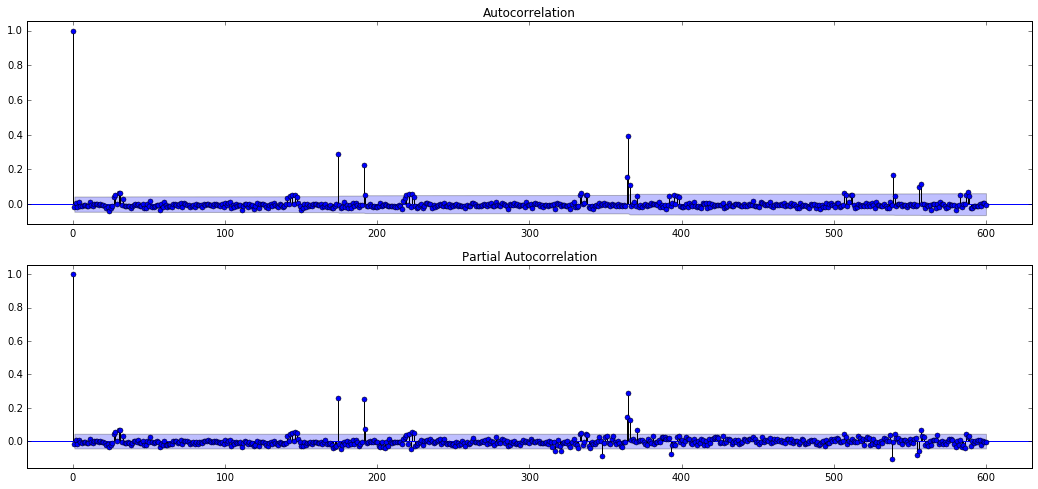

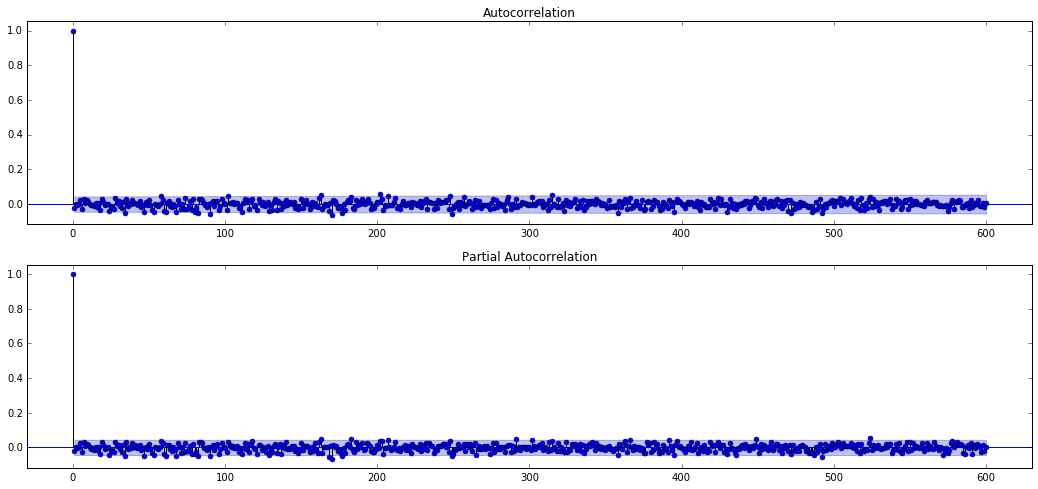

In [120]:
print df_ts2[df_ts2.target==0] #looks like the target is 0 on the 4th of July, Thanksgiving, and Christmas

acf_pcf_plot(df_ts2, 600) #shows a strong seasonal component, with at a lag of a year and half year





In [ ]:
#what does it look like after dropping the zero holidays?
df_ts2_noholi = df_ts2[df_ts2.target!=0]
acf_pcf_plot(df_ts2_noholi, 600) #don't see much if any correlation
# acf_pcf_plot(df_ts2_noholi, 100)

I throwout the zeros (which are perfectly explained by the holidays listed above) and then would include just a constant since there doesn't appear to be any MA or AR signatures and it seems to be stationary. 

#### ts3.csv

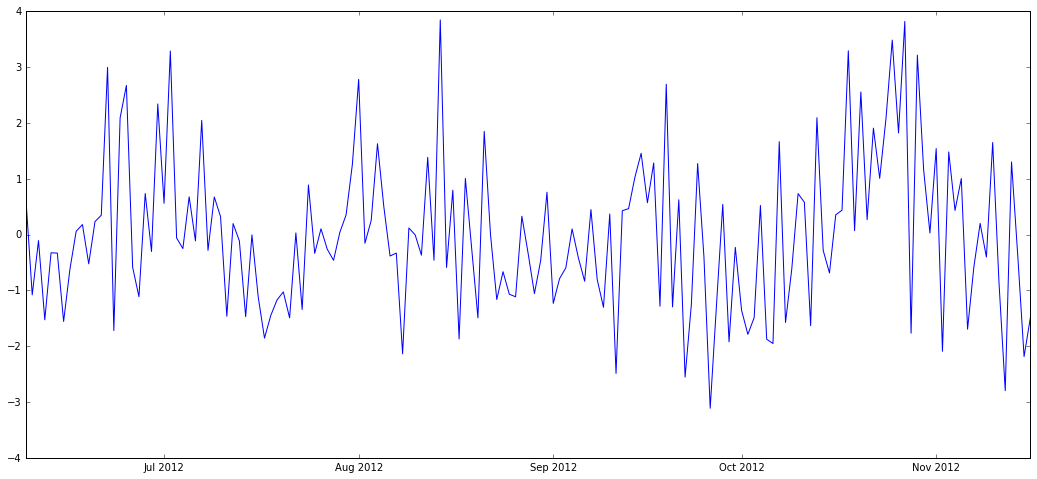

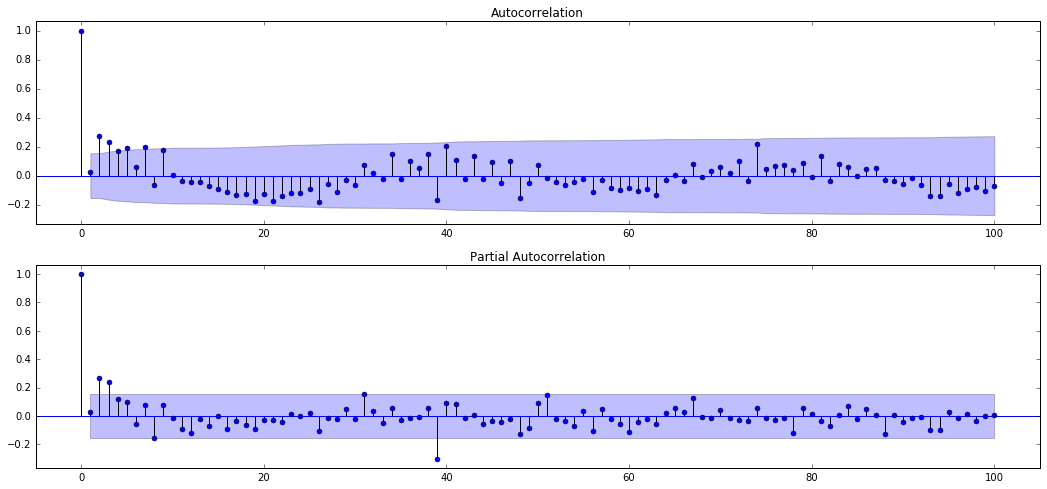

In [133]:
df_ts3_diff = df_ts3.diff(periods=39).dropna() #seasonal differencing at frequency of 39 or 40 periods
ts_plot(df_ts3_diff)
acf_pcf_plot(df_ts3_diff, 100)

The plot of the seasonally differenced series still does not look stationary. Nevertheless, I'd add a 40 period lag and an AR term.

### 3

In [5]:
df_ts4 = pd.read_csv('../hackerrank_data/skill-assessment/DSTakeHome/ts4.csv')
df_ts5 = pd.read_csv('../hackerrank_data/skill-assessment/DSTakeHome/ts5.csv')

df_ts4.date = pd.to_datetime(df_ts4.date)
df_ts4.index = df_ts4.date
df_ts4.drop(['date'], 1, inplace=True)

df_ts5.date = pd.to_datetime(df_ts5.date)
df_ts5.index = df_ts5.date
df_ts5.drop(['date'], 1, inplace=True)

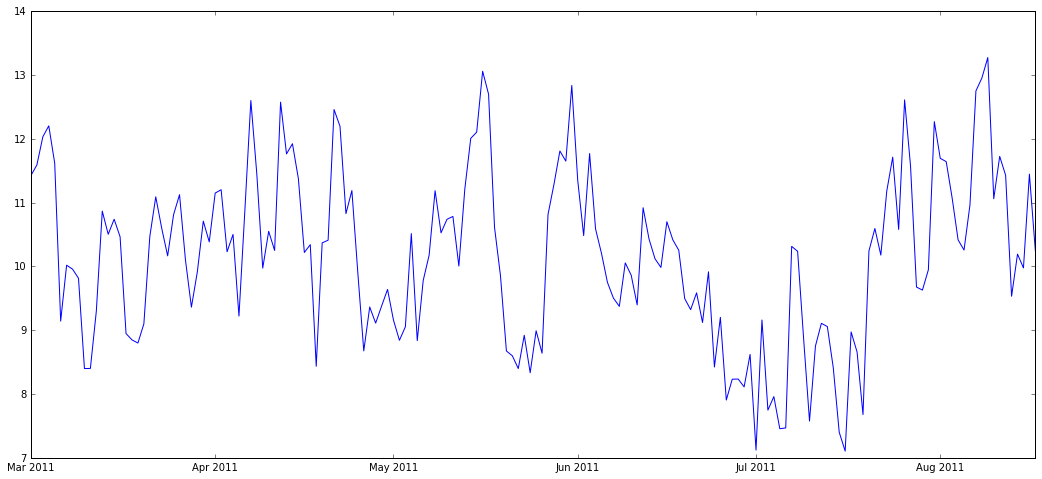

In [20]:
ts_plot(df_ts4)

In [22]:
print df_ts4.std()

df_ts4_diff = df_ts4.diff(periods=1).dropna()
print df_ts4_diff.std()

df_ts4_diff2 = df_ts4_diff.diff(periods=1).dropna()
print df_ts4_diff2.std()
#the first differenced ts has lowest variance, suggesting first differencing is appropriate

acf_pcf_plot(df_ts4, 60) #also suggests first differencing

target    1.337537
dtype: float64
target    1.011743
dtype: float64
target    1.554064
dtype: float64


In [81]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df_ts4.target, autolag='AIC')
print dftest

dftest = adfuller(df_ts4_diff.target, autolag='AIC')
print dftest

(-5.3192938443947382, 4.9936253202194394e-06, 0, 169, {'5%': -2.8787989063084951, '1%': -3.4696482639876569, '10%': -2.5759713094779593}, 423.97624145216469)
(-5.9204264300576508, 2.5140865953559233e-07, 11, 157, {'5%': -2.8801316723537318, '1%': -3.4727031195048541, '10%': -2.5766826861130268}, 432.55690096553406)


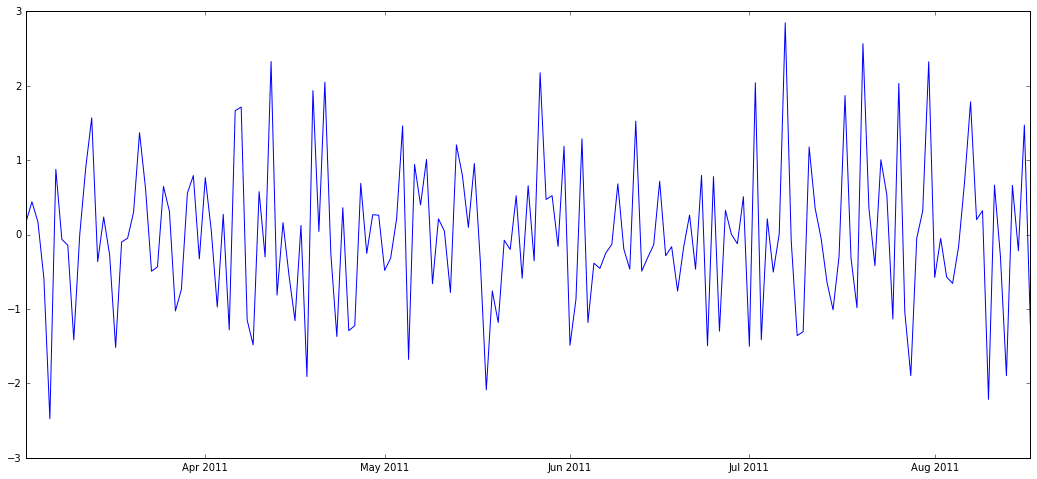

               target
date                 
2011-03-01  11.426376
2011-03-02  11.592365
2011-03-03  12.033633
2011-03-04  12.205679
2011-03-05  11.618540
2011-03-06   9.143627
2011-03-07  10.020364
2011-03-08   9.958126
2011-03-09   9.814893
2011-03-10   8.399673
2011-03-11   8.401621
2011-03-12   9.299076
2011-03-13  10.868033
2011-03-14  10.504835
2011-03-15  10.741056
2011-03-16  10.464934
2011-03-17   8.948394
2011-03-18   8.848882
2011-03-19   8.799927
2011-03-20   9.100636
2011-03-21  10.470470
2011-03-22  11.092505
2011-03-23  10.600230
2011-03-24  10.166799
2011-03-25  10.813723
2011-03-26  11.126269
2011-03-27  10.099633
2011-03-28   9.362248
2011-03-29   9.918155
2011-03-30  10.711242
...               ...
2011-07-19   7.677742
2011-07-20  10.243710
2011-07-21  10.595697
2011-07-22  10.178341
2011-07-23  11.183322
2011-07-24  11.714748
2011-07-25  10.581080
2011-07-26  12.612859
2011-07-27  11.573974
2011-07-28   9.677287
2011-07-29   9.629701
2011-07-30   9.948329
2011-07-31

In [31]:
ts_plot(df_ts4_diff) #appears stationary

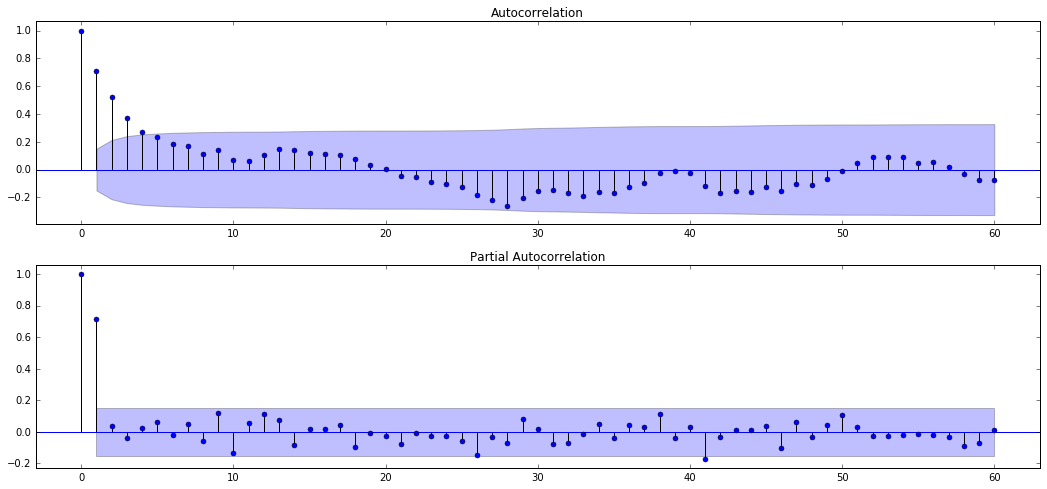

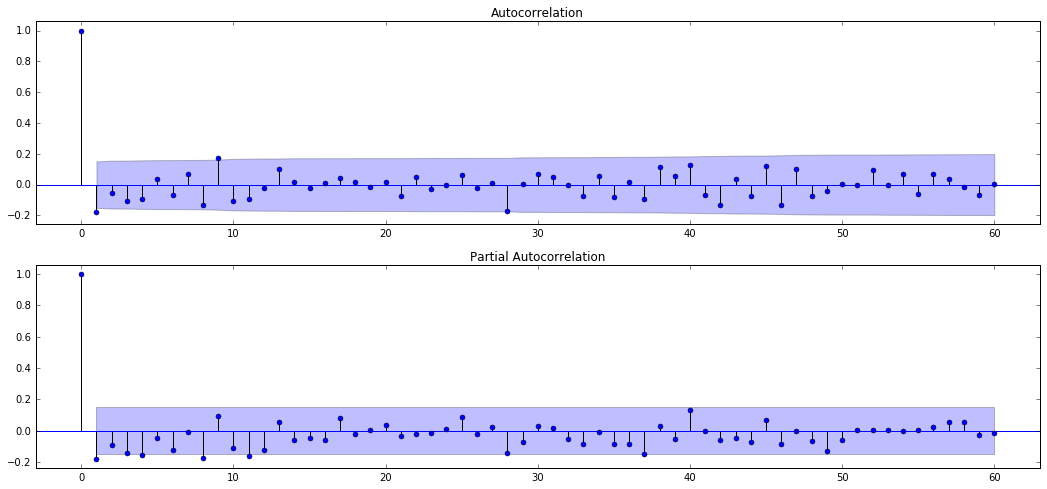

In [82]:
acf_pcf_plot(df_ts4, 60)
acf_pcf_plot(df_ts4_diff, 60)

In [106]:
from statsmodels.tsa.arima_model import ARIMA

# model = ARIMA(df_ts4, (1,0,0)).fit(trend='nc')
# model = ARIMA(df_ts4, (1,0,0)).fit(trend='c')
# model = ARIMA(df_ts4, (0,1,1)).fit(trend='nc')
model = ARIMA(df_ts4, (1,0,0)).fit(trend='c')

print model.summary()
# print model.fittedvalues

# think i need to maybe get the start parameters
# print model.forecast(30)

                              ARMA Model Results                              
Dep. Variable:                 target   No. Observations:                  170
Model:                     ARMA(1, 0)   Log Likelihood                -229.708
Method:                       css-mle   S.D. of innovations              0.933
Date:                Fri, 16 Dec 2016   AIC                            465.417
Time:                        13:16:38   BIC                            474.824
Sample:                    03-01-2011   HQIC                           469.234
                         - 08-17-2011                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.1757      0.245     41.472      0.000       9.695      10.657
ar.L1.target     0.7126      0.053     13.369      0.000       0.608       0.817
                                    Roots   

In [157]:
df_ts4_test = pd.read_csv('../hackerrank_data/skill-assessment/DSTakeHome/ts4_test.csv')
print np.sum(np.abs(df_ts4_test.target.values - model.forecast(30)[0]))
print np.sum((df_ts4_test.target.values - model.forecast(30)[0])**2)


30.0501511049
41.846287028


In [152]:
n_predict = 30
extrapolation_ts4 = fourierExtrapolation(df_ts4.target.values, n_predict)
print np.sum(np.abs(df_ts4_test.target.values - extrapolation_ts4[-30:]))
print np.sum((df_ts4_test.target.values - extrapolation_ts4[-30:])**2)

37.152782636
69.6658177499


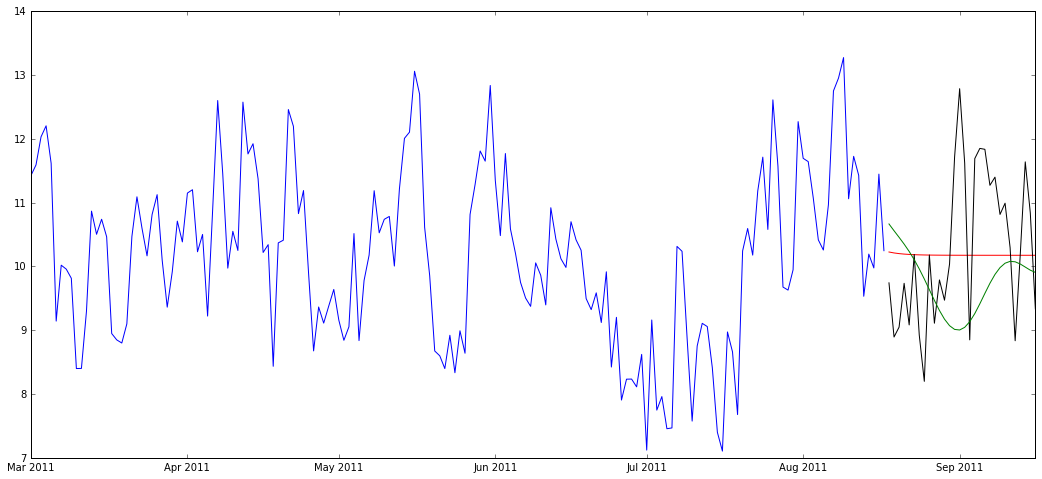

In [170]:
fc = pd.DataFrame(model.forecast(30)[0], columns=['target'])
fc.index = pd.date_range(start='2011-08-18', periods=30)

extrapolation_ts4_test = pd.DataFrame(extrapolation_ts4[-30:], columns=['target'])
extrapolation_ts4_test.index = pd.date_range(start='2011-08-18', periods=30)

# df_ts4_test.date = pd.to_datetime(df_ts4_test.date)
# df_ts4_test.index = df_ts4_test.date
# df_ts4_test.drop(['date'], 1, inplace=True)

fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(1,1,1)
ax.plot(df_ts4)
ax.plot(fc, 'r')
ax.plot(df_ts4_test, 'k')
ax.plot(extrapolation_ts4_test, 'g')
plt.show()

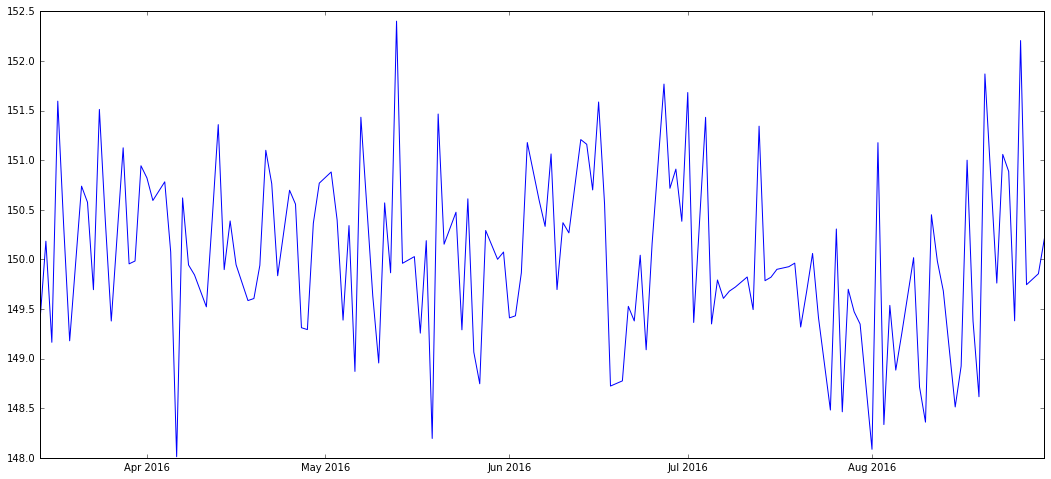

In [135]:
ts_plot(df_ts5)

In [134]:
print df_ts5.std()

# df_ts5_diff = df_ts5.diff(periods=1).dropna()
# print df_ts5_diff.std()

# df_ts4_diff2 = df_ts4_diff.diff(periods=1).dropna()
# print df_ts4_diff2.std()
# #the first differenced ts has lowest variance, suggesting first differencing is appropriate

# acf_pcf_plot(df_ts4, 60) #also suggests first differencing

target    0.875518
dtype: float64


In [136]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df_ts5.target, autolag='AIC')
print dftest


(-7.2721060786164555, 1.5785640061933352e-10, 1, 144, {'5%': -2.8818291230495543, '1%': -3.4765979175374011, '10%': -2.5775887982253085}, 340.57059653206346)


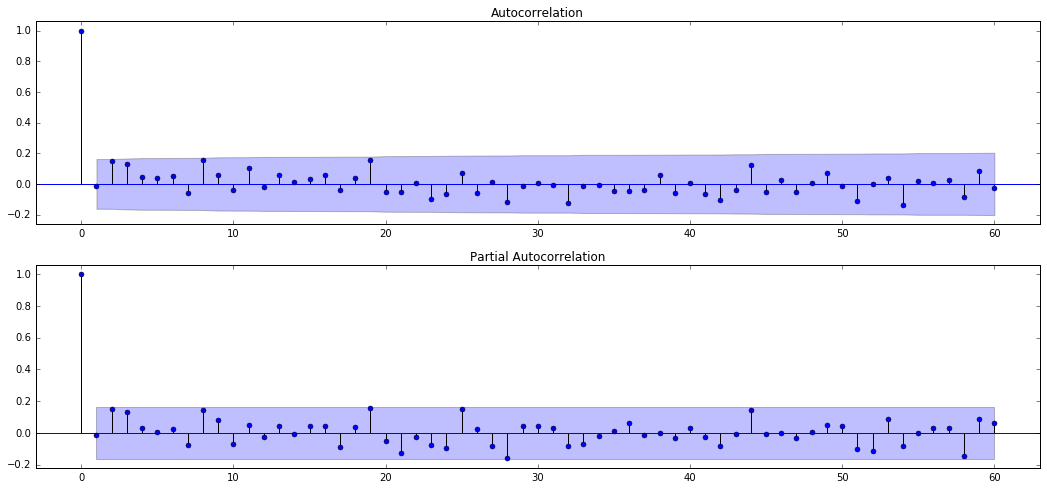

In [137]:
acf_pcf_plot(df_ts5, 60)

In [138]:
import numpy as np
import pylab as pl
from numpy import fft
    
def fourierExtrapolation(x, n_predict):
    n = x.size
    n_harm = 10                     # number of harmonics in model
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)         # find linear trend in x
    x_notrend = x - p[0] * t        # detrended x
    x_freqdom = fft.fft(x_notrend)  # detrended x in frequency domain
    f = fft.fftfreq(n)              # frequencies
    indexes = range(n)
    # sort indexes by frequency, lower -> higher
    indexes.sort(key = lambda i: np.absolute(f[i]))
 
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return restored_sig + p[0] * t
    

In [140]:
n_predict = 30
extrapolation = fourierExtrapolation(df_ts5.target.values, n_predict)
print extrapolation
# pl.plot(np.arange(0, extrapolation.size), extrapolation, 'r', label = 'extrapolation')
# pl.plot(np.arange(0, x.size), x, 'b', label = 'x', linewidth = 3)
# pl.legend()
# pl.show()
    

[ 150.25446244  150.14737593  150.08577995  150.07099548  150.09824324
  150.15791805  150.23740437  150.3231087   150.40238255  150.46506161
  150.50443866  150.51760062  150.50517238  150.47060216  150.41918067
  150.35700239  150.29005328  150.22355401  150.16161534  150.10718859
  150.06223473  150.02800058  150.00528587  149.99460849  149.99621882
  150.00996761  150.03508049  150.06992604  150.11187408  150.15732567
  150.20195829  150.24117878  150.27072331  150.28730134  150.28915798
  150.27643428  150.25123555  150.21737097  150.17979084  150.14380946
  150.11424833  150.09465562  150.08674842  150.09018514  150.10271333
  150.1206648   150.13970078  150.15565779  150.16532283  150.1669786
  150.16060511  150.14769509  150.13072282  150.11238339  150.09477514
  150.07871938  150.063393    150.04639108  150.02425005  149.99336096
  149.9511091   149.89700824  149.83357223  149.76669144  149.7053558
  149.66067901  149.64431196  149.66646215  149.73383627  149.84787284
  150.00

                target
date                  
2016-03-14  149.373546
2016-03-15  150.183643
2016-03-16  149.164371
2016-03-17  151.595281
2016-03-18  150.329508
2016-03-19  149.179532
2016-03-21  150.738325
2016-03-22  150.575781
2016-03-23  149.694612
2016-03-24  151.511781
2016-03-25  150.389843
2016-03-26  149.378759
2016-03-28  151.124931
2016-03-29  149.955066
2016-03-30  149.983810
2016-03-31  150.943836
2016-04-01  150.821221
2016-04-02  150.593901
2016-04-04  150.782136
2016-04-05  150.074565
2016-04-06  148.010648
2016-04-07  150.619826
2016-04-08  149.943871
2016-04-09  149.844204
2016-04-11  149.521850
2016-04-12  150.417942
2016-04-13  151.358680
2016-04-14  149.897212
2016-04-15  150.387672
2016-04-16  149.946195
...                ...
2016-07-27  148.463550
2016-07-28  149.699024
2016-07-29  149.471720
2016-07-30  149.347905
2016-08-01  148.085641
2016-08-02  151.176583
2016-08-03  148.335028
2016-08-04  149.536470
2016-08-05  148.884080
2016-08-06  149.249181
2016-08-08 

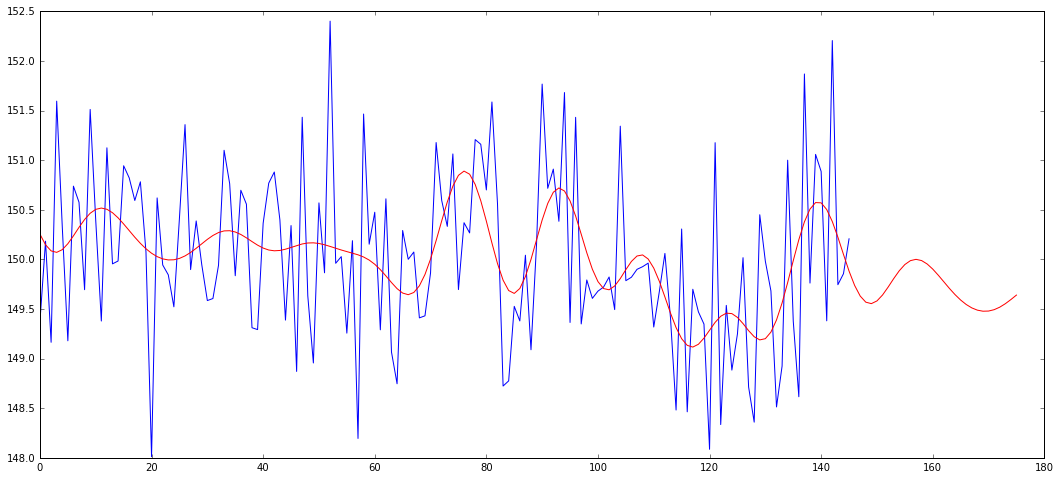

In [148]:
df_ts5_test = pd.read_csv('../hackerrank_data/skill-assessment/DSTakeHome/ts5_test.csv')

# fig = plt.figure(figsize=(18,8))
# ax = fig.add_subplot(1,1,1)
# ax.plot(df_ts5.target.values)
# ax.plot(extrapolation, 'r')
# # ax.plot(df_ts5_test.target.values, 'k')
# plt.show()

In [151]:
print np.sum(np.abs(df_ts5_test.target.values - extrapolation[-30:]))
print np.sum((df_ts5_test.target.values - extrapolation[-30:])**2)


620.721941728
89651.2520316
